## Загрузим нужные библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np 

%matplotlib inline

In [2]:
df_train = pd.read_csv("../input/dataset-vologda/train_dataset_train.csv")
df_test = pd.read_csv("../input/dataset-vologda/test_dataset_test (1).csv")

## Рассмотрим датасет по ближе

In [3]:
df_train.head(3).T

,0,1,2
RecordNo,6145,7006,1124
Название книги,Зулейха открывает глаза,Зулейха открывает глаза,Дети мои
Автор,Гузель Яхина,Гузель Яхина,Гузель Яхина
Ссылка на литрес,https://www.litres.ru/guzel-yahina/zuleyha-otk...,https://www.litres.ru/guzel-yahina/zuleyha-otk...,https://www.litres.ru/guzel-yahina/deti-moi/
Рейтинг,4.7,4.6,4.4
Количество оценок,3922,24719,8032
Количество отзывов,408,2103,702
Имя читателя,Айгуль Ляпина,Olga T,Кирилл Чириков
Оценка книги читателем (из 5 баллов),5.0,5.0,5.0
Отзыв,Рекомендую книгу в прочтению/прослушиванию. Ес...,"Удивительно, что сейчас возникает ТАКАЯ литера...","Душевно, жизненно, чувственно, проникновенно!!..."


In [4]:
df_train.shape

(4839, 17)

## Добавим новых признаков

<AxesSubplot:>

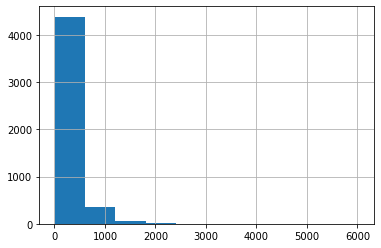

In [5]:
df_train["len_reviews"] = df_train["Отзыв"].map(len)
df_train["len_reviews"].hist()

In [6]:
df_train["Автор"] = pd.Categorical(df_train["Автор"])
df_train["Автор"].astype('category').cat.codes
df_train["Автор"] = df_train["Автор"].cat.codes

In [7]:
df_train = df_train.fillna(0)

## Построим на распределение данных

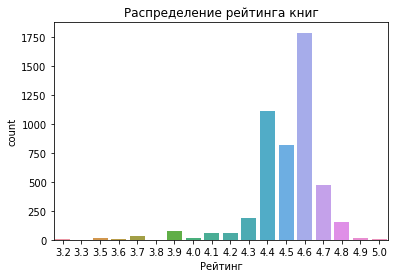

In [8]:
_ = sns.countplot(x = "Рейтинг" , data  = df_train).set_title('Распределение рейтинга книг')

Взглянем на несколько величин сразу

In [9]:
df_train.columns.values

array(['RecordNo', 'Название книги', 'Автор', 'Ссылка на литрес',
       'Рейтинг', 'Количество оценок', 'Количество отзывов',
       'Имя читателя', 'Оценка книги читателем (из 5 баллов)', 'Отзыв',
       'Лайки на отзыв', 'Дислайки на отзыв', 'Релевантность',
       'Таксономия релевантные', 'Таксономия не релевантные',
       'Длина отзыва', 'Ценности', 'len_reviews'], dtype=object)

In [10]:
#features = list(set(df_train.columns.values) - set(['RecordNo']))

#_ = df_train[features].hist(figsize=(20,12))

In [11]:
#df_train["Дислайки на отзыв"].value_counts()

In [12]:
#plt.rcParams['figure.figsize']=(15,15)

#g = sns.heatmap(df_train.corr(), square = True, annot=True)

## Выделим выборки

In [13]:
label_cols = ['Релевантность', 'Таксономия релевантные', 'Таксономия не релевантные', 'Длина отзыва', 'Ценности']
#data_cols = ['Название книги', 'Автор', 'Рейтинг', 'Имя читателя', 'Отзыв']
data_cols = ['Отзыв']

In [14]:
df_train_labels = df_train[label_cols]
df_train_labels

,Релевантность,Таксономия релевантные,Таксономия не релевантные,Длина отзыва,Ценности
0,0,0,0,0,0
1,0,0,0,0,1
2,0,1,0,0,1
3,0,1,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
4834,0,0,0,0,0
4835,1,1,0,0,1
4836,0,0,1,0,0
4837,0,0,0,0,0


# BERT

In [15]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    
    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [16]:
!pip install transformers

In [17]:
from transformers import RobertaConfig

# Initializing a RoBERTa configuration
configuration = RobertaConfig()

configuration.num_labels = 2

In [18]:
from transformers import AdamW, BertConfig
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("roberta-base", max_length = 512)

model = AutoModelForSequenceClassification.from_pretrained(
    "roberta-base", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    #output_attentions = False, # Whether the model returns attentions weights.
    #output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.

#model.cuda()

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.weight', 'roberta.pooler.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

In [19]:
model.cuda()

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerN

In [20]:
max_len = 0

sentences = df_train['Отзыв'].values

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Token indices sequence length is longer than the specified maximum sequence length for this model (687 > 512). Running this sequence through the model will result in indexing errors


Max sentence length:  6425


In [21]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []


# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 500,           # Pad & truncate all sentences.
                        truncation=True,
                        pad_to_max_length = True,
                        padding='max_length',
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)


# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  Рекомендую книгу в прочтению/прослушиванию. Есть о чем задуматься… Написано тоже осень хорошо. Иногда даже всплакнуть хотелось. Рада, что не жила в то время.
Token IDs: tensor([    0, 25417, 21402, 25482, 41171, 41613,  4394, 25482, 36765, 37947,
        42488, 22063, 12736, 18697,  3070, 36765, 35328, 25417, 15264, 42488,
        18697, 14292, 18697,  9470, 24269, 34251, 22063,  6382, 35555, 25482,
        36765, 35328, 22063, 12736,    73, 25417,  9470, 24269, 34251, 36709,
        40966, 42488, 22063, 23133, 35328, 42907, 26161, 36765, 35328, 22063,
        12736,     4, 18697, 15722, 36709, 35555, 47015, 18697,  4726,  1437,
        22063,  6382, 25482, 46056, 18697, 18400, 26161, 37947, 42488, 46056,
        26161, 35555, 47015, 36709, 33162,  1174, 18697,    46, 26161, 25417,
         9470, 35328, 36709, 26161, 36765, 34251,  1437, 35555, 41613, 19002,
        25482, 18697,  4726, 36709, 25482, 36765, 47015,  1437, 22063,  5782,
        34251, 24269, 34251, 22063, 2313

In [22]:
labels_torch = []
for col in df_train_labels.columns:
    labels = df_train_labels[col]
    labels = torch.tensor(labels)
    labels_torch.append(labels)

In [23]:
col_num = 3
df_train_labels.columns[col_num]

'Длина отзыва'

In [24]:

from torch.utils.data import TensorDataset, random_split

#

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels_torch[col_num])

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

4,355 training samples
  484 validation samples


In [25]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 16

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
valid_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [26]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

/opt/conda/lib/python3.7/site-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [27]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 4

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [28]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

def flat_recall(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
    TP = np.sum(pred_flat * labels_flat )
    FN = np.sum((pred_flat == 0) * labels_flat )
    recall    = TP / (TP + FN)
    return recall


In [29]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [30]:
import random
import numpy as np

from ignite.metrics import Precision, Recall

precision = Precision(average=False)
recall = Recall(average=False)

def train_model(model, train_dataloader, validation_dataloader):
    # This training code is based on the `run_glue.py` script here:
    # https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

    # Set the seed value all over the place to make this reproducible.
    seed_val = 42

    random.seed(seed_val)
    np.random.seed(seed_val)
    torch.manual_seed(seed_val)
    torch.cuda.manual_seed_all(seed_val)

    # We'll store a number of quantities such as training and validation loss, 
    # validation accuracy, and timings.
    training_stats = []

    # Measure the total training time for the whole run.
    total_t0 = time.time()

    batch_loss = 0

    # For each epoch...
    for epoch_i in range(0, epochs):

        # ========================================
        #               Training
        # ========================================

        # Perform one full pass over the training set.

        print("")
        print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
        print('Training...')

        # Measure how long the training epoch takes.
        t0 = time.time()

        # Reset the total loss for this epoch.
        total_train_loss = 0

        # Put the model into training mode. Don't be mislead--the call to 
        # `train` just changes the *mode*, it doesn't *perform* the training.
        # `dropout` and `batchnorm` layers behave differently during training
        # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):

            # Progress update every 40 batches.
            if step % 100 == 0 and not step == 0:
                # Calculate elapsed time in minutes.
                elapsed = format_time(time.time() - t0)

                # Report progress.
                print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

            # Unpack this training batch from our dataloader. 
            #
            # As we unpack the batch, we'll also copy each tensor to the GPU using the 
            # `to` method.
            #
            # `batch` contains three pytorch tensors:
            #   [0]: input ids 
            #   [1]: attention masks
            #   [2]: labels 
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)
            #print(batch[2])

            # Always clear any previously calculated gradients before performing a
            # backward pass. PyTorch doesn't do this automatically because 
            # accumulating the gradients is "convenient while training RNNs". 
            # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
            model.zero_grad()        

            # Perform a forward pass (evaluate the model on this training batch).
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # It returns different numbers of parameters depending on what arguments
            # arge given and what flags are set. For our useage here, it returns
            # the loss (because we provided labels) and the "logits"--the model
            # outputs prior to activation.
            res = model(b_input_ids, 
                                 token_type_ids=None, 
                                 attention_mask=b_input_mask, 
                                 labels=b_labels)
            loss = res['loss']
            logits = res['logits']

            # Accumulate the training loss over all of the batches so that we can
            # calculate the average loss at the end. `loss` is a Tensor containing a
            # single value; the `.item()` function just returns the Python value 
            # from the tensor.
            total_train_loss += loss.item()
            batch_loss += loss.item()

            # Perform a backward pass to calculate the gradients.
            loss.backward()

            # Clip the norm of the gradients to 1.0.
            # This is to help prevent the "exploding gradients" problem.
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and take a step using the computed gradient.
            # The optimizer dictates the "update rule"--how the parameters are
            # modified based on their gradients, the learning rate, etc.
            optimizer.step()

            # Update the learning rate.
            scheduler.step()

            # batch loss indication
            if step % 100 == 0 and not step == 0:
                # Calculate elapsed time in minutes.
                elapsed = format_time(time.time() - t0)

                # Report progress.
                print('  Batch {:>5,}  loss:  {:}.'.format(step, batch_loss))
                batch_loss = 0

        # Calculate the average loss over all of the batches.
        avg_train_loss = total_train_loss / len(train_dataloader)            

        # Measure how long this epoch took.
        training_time = format_time(time.time() - t0)

        print("")
        print("  Average training loss: {0:.2f}".format(avg_train_loss))
        print("  Training epcoh took: {:}".format(training_time))

        # ========================================
        #               Validation
        # ========================================
        # After the completion of each training epoch, measure our performance on
        # our validation set.

        print("")
        print("Running Validation...")

        t0 = time.time()

        # Put the model in evaluation mode--the dropout layers behave differently
        # during evaluation.
        model.eval()

        # Tracking variables 
        total_eval_accuracy = 0
        total_eval_recall = 0
        total_eval_loss = 0
        nb_eval_steps = 0

        # Evaluate data for one epoch
        for batch in validation_dataloader:

            # Unpack this training batch from our dataloader. 
            #
            # As we unpack the batch, we'll also copy each tensor to the GPU using 
            # the `to` method.
            #
            # `batch` contains three pytorch tensors:
            #   [0]: input ids 
            #   [1]: attention masks
            #   [2]: labels 
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)

            # Tell pytorch not to bother with constructing the compute graph during
            # the forward pass, since this is only needed for backprop (training).
            with torch.no_grad():        

                # Forward pass, calculate logit predictions.
                # token_type_ids is the same as the "segment ids", which 
                # differentiates sentence 1 and 2 in 2-sentence tasks.
                # The documentation for this `model` function is here: 
                # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
                # Get the "logits" output by the model. The "logits" are the output
                # values prior to applying an activation function like the softmax.
                res = model(b_input_ids, 
                                       token_type_ids=None, 
                                       attention_mask=b_input_mask,
                                       labels=b_labels)
            loss = res['loss']
            logits = res['logits']

            # Accumulate the validation loss.
            total_eval_loss += loss.item()

            # Move logits and labels to CPU
            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()

            # Calculate the accuracy for this batch of test sentences, and
            # accumulate it over all batches.
            total_eval_accuracy += flat_accuracy(logits, label_ids)
            total_eval_recall += flat_recall(logits, label_ids)


        # Report the final accuracy for this validation run.
        avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
        avg_val_recall = total_eval_recall / len(validation_dataloader)
        print("  Accuracy: {0:.2f}".format(avg_val_accuracy))
        print("  Recall: {0:.2f}".format(avg_val_recall))

        # Calculate the average loss over all of the batches.
        avg_val_loss = total_eval_loss / len(validation_dataloader)

        # Measure how long the validation run took.
        validation_time = format_time(time.time() - t0)

        print("  Validation Loss: {0:.2f}".format(avg_val_loss))
        print("  Validation took: {:}".format(validation_time))

        # Record all statistics from this epoch.
        training_stats.append(
            {
                'epoch': epoch_i + 1,
                'Training Loss': avg_train_loss,
                'Valid. Loss': avg_val_loss,
                'Valid. Accur.': avg_val_accuracy,
                'Valid. Recall': avg_val_recall,
                'Training Time': training_time,
                'Validation Time': validation_time
            }
        )

    print("")
    print("Training complete!")

    print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))

In [31]:
train_model(model, train_dataloader, valid_dataloader)


======== Epoch 1 / 4 ========
Training...
  Batch   100  of    273.    Elapsed: 0:01:22.
  Batch   100  loss:  46.93222723901272.
  Batch   200  of    273.    Elapsed: 0:02:44.
  Batch   200  loss:  38.24352120608091.

  Average training loss: 0.37
  Training epcoh took: 0:03:43

Running Validation...
  Accuracy: 0.94
  Recall: 0.85
  Validation Loss: 0.15
  Validation took: 0:00:08

======== Epoch 2 / 4 ========
Training...
  Batch   100  of    273.    Elapsed: 0:01:22.
  Batch   100  loss:  36.925870940089226.
  Batch   200  of    273.    Elapsed: 0:02:43.
  Batch   200  loss:  18.987344566965476.

  Average training loss: 0.17
  Training epcoh took: 0:03:42

Running Validation...
  Accuracy: 0.96
  Recall: 0.85
  Validation Loss: 0.17
  Validation took: 0:00:08

======== Epoch 3 / 4 ========
Training...
  Batch   100  of    273.    Elapsed: 0:01:21.
  Batch   100  loss:  19.26856392400805.
  Batch   200  of    273.    Elapsed: 0:02:43.
  Batch   200  loss:  11.975593568000477.

  A

In [32]:
%%time
#Wall time: 10min 50s

sentences = df_test['Отзыв'].values
#labels = df.label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 500,           # Pad & truncate all sentences.
                        truncation=True,
                        #pad_to_max_length = True,
                        padding='max_length',
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
#labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks) #, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

CPU times: user 1.41 s, sys: 43.9 ms, total: 1.45 s
Wall time: 1.44 s


In [33]:
%%time
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
  
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask = batch
  
    # Telling the model not to compute or store gradients, saving memory and 
    # speeding up prediction
    with torch.no_grad():
        # Forward pass, calculate logit predictions
        outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

    logits = outputs[0]

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    #label_ids = b_labels.to('cpu').numpy()
  
    # Store predictions and true labels
    predictions.append(logits)
    #true_labels.append(label_ids)

print('Prediction    DONE.')

Predicting labels for 2,075 test sentences...
Prediction    DONE.
CPU times: user 32.3 s, sys: 36.1 ms, total: 32.4 s
Wall time: 32.4 s


In [34]:
flat_predictions = np.concatenate(predictions, axis=0)

flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

In [35]:
df_test[df_train_labels.columns[col_num]] = list(flat_predictions)
df_test

,RecordNo,Название книги,Автор,Ссылка на литрес,Рейтинг,Количество оценок,Количество отзывов,Имя читателя,Оценка книги читателем (из 5 баллов),Отзыв,Лайки на отзыв,Дислайки на отзыв,Длина отзыва
0,3366,Дети мои,Гузель Яхина,https://www.litres.ru/guzel-yahina/deti-moi/,4.4,8032,702,Марина Ефимкина,5.0,"Настоящая глубокая книга, коих сейчас очень не...",2,0,0
1,3952,Текст,Дмитрий Глуховский,https://www.litres.ru/dmitriy-gluhovskiy/tekst...,4.5,1923,246,alexvarp,5.0,Одна из лучших книг прочитанных за последние г...,1,0,1
2,6852,Текст,Дмитрий Глуховский,https://www.litres.ru/dmitriy-gluhovskiy/tekst/,4.4,7276,622,fb_154207611938008,5.0,"Тот случай, когда невозможно пройти мимо, не о...",0,0,0
3,4586,Зулейха открывает глаза,Гузель Яхина,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.6,24719,2103,Мария Курочкина,NaN,"Очень не глубокая книга. Дочитала до конца, в ...",4,0,1
4,4677,Зулейха открывает глаза,Гузель Яхина,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.6,24719,2103,sahnovavera,NaN,"Очень понравилась. Читается легко, о непростых...",0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,4661,Зулейха открывает глаза,Гузель Яхина,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.6,24719,2103,Екатерина Юзбашьян,5.0,"Очень понравилась!!!! Написана грамотным, крас...",0,1,0
2071,1547,Дети мои,Гузель Яхина,https://www.litres.ru/guzel-yahina/deti-moi/,4.4,8032,702,239833928,4.0,Зулейха понравилась больше. Книга Дети мои каж...,0,0,0
2072,6071,Зулейха открывает глаза,Гузель Яхина,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.6,24719,2103,I be,5.0,"Прочла на одном дыхании, не смотря на раздираю...",0,1,1
2073,3805,С неба упали три яблока,Наринэ Абгарян,https://www.litres.ru/narine-abgaryan/s-neba-u...,4.8,1455,189,Ольга Акопян,5.0,нет слов. потрясающе. эту книгу не описать. но...,0,0,0


## Оценка точности

In [36]:
df_test

,RecordNo,Название книги,Автор,Ссылка на литрес,Рейтинг,Количество оценок,Количество отзывов,Имя читателя,Оценка книги читателем (из 5 баллов),Отзыв,Лайки на отзыв,Дислайки на отзыв,Длина отзыва
0,3366,Дети мои,Гузель Яхина,https://www.litres.ru/guzel-yahina/deti-moi/,4.4,8032,702,Марина Ефимкина,5.0,"Настоящая глубокая книга, коих сейчас очень не...",2,0,0
1,3952,Текст,Дмитрий Глуховский,https://www.litres.ru/dmitriy-gluhovskiy/tekst...,4.5,1923,246,alexvarp,5.0,Одна из лучших книг прочитанных за последние г...,1,0,1
2,6852,Текст,Дмитрий Глуховский,https://www.litres.ru/dmitriy-gluhovskiy/tekst/,4.4,7276,622,fb_154207611938008,5.0,"Тот случай, когда невозможно пройти мимо, не о...",0,0,0
3,4586,Зулейха открывает глаза,Гузель Яхина,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.6,24719,2103,Мария Курочкина,NaN,"Очень не глубокая книга. Дочитала до конца, в ...",4,0,1
4,4677,Зулейха открывает глаза,Гузель Яхина,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.6,24719,2103,sahnovavera,NaN,"Очень понравилась. Читается легко, о непростых...",0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,4661,Зулейха открывает глаза,Гузель Яхина,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.6,24719,2103,Екатерина Юзбашьян,5.0,"Очень понравилась!!!! Написана грамотным, крас...",0,1,0
2071,1547,Дети мои,Гузель Яхина,https://www.litres.ru/guzel-yahina/deti-moi/,4.4,8032,702,239833928,4.0,Зулейха понравилась больше. Книга Дети мои каж...,0,0,0
2072,6071,Зулейха открывает глаза,Гузель Яхина,https://www.litres.ru/guzel-yahina/zuleyha-otk...,4.6,24719,2103,I be,5.0,"Прочла на одном дыхании, не смотря на раздираю...",0,1,1
2073,3805,С неба упали три яблока,Наринэ Абгарян,https://www.litres.ru/narine-abgaryan/s-neba-u...,4.8,1455,189,Ольга Акопян,5.0,нет слов. потрясающе. эту книгу не описать. но...,0,0,0


In [37]:
output = pd.DataFrame({'RecordNo': df_test["RecordNo"],
                       df_train_labels.columns[col_num]: df_test[df_train_labels.columns[col_num]] })

output.to_csv(f'/kaggle/working/submission_{col_num}.csv', index=False)
output

,RecordNo,Длина отзыва
0,3366,0
1,3952,1
2,6852,0
3,4586,1
4,4677,0
...,...,...
2070,4661,0
2071,1547,0
2072,6071,1
2073,3805,0


In [38]:
output[df_train_labels.columns[col_num]].value_counts()

0    1626
1     449
Name: Длина отзыва, dtype: int64